In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sprint = pd.read_csv('sprint_results.csv', encoding="utf-8")
results = pd.read_csv('results.csv', encoding="utf-8")
races = pd.read_csv('races.csv',encoding = "utf-8")
constructors = pd.read_csv('constructors.csv',encoding = "utf-8")
sprint.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


In [2]:
constructors.head()
cons = constructors[['constructorId', 'name']]
cons.head()

,constructorId,name
0,1,McLaren
1,2,BMW Sauber
2,3,Williams
3,4,Renault
4,5,Toro Rosso


In [3]:
races.head()
my_races = races[['raceId', 'year']]
my_races.head()

,raceId,year
0,1,2009
1,2,2009
2,3,2009
3,4,2009
4,5,2009


In [4]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [5]:
results = results[['raceId', 'driverId', 'points', 'laps', 'milliseconds']]
results.rename(columns = {'milliseconds': 'race_time'}, inplace = True)
results.rename(columns = {'points': 'race_points'}, inplace = True)
results.rename(columns = {'laps': 'race_laps'}, inplace = True)

# remove missing values
results.replace('\\N', np.nan, inplace=True)
results.dropna(inplace=True)
results.head()

,raceId,driverId,race_points,race_laps,race_time
0,18,1,10.0,58,5690616
1,18,2,8.0,58,5696094
2,18,3,6.0,58,5698779
3,18,4,5.0,58,5707797
4,18,5,4.0,58,5708630


In [6]:
print(results['race_time'].dtype)
results['race_time'] = results['race_time'].astype(int)
print(results['race_time'].dtype)

object
int64


In [7]:
# remove missing values
sprint.replace('\\N', np.nan, inplace=True)
sprint.dropna(inplace=True)
sprint.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


In [8]:
print(sprint['milliseconds'].dtype)
sprint['milliseconds'] = sprint['milliseconds'].astype(int)
print(sprint['milliseconds'].dtype)

object
int64


In [9]:
sprint = sprint[['raceId', 'driverId', 'constructorId', 'points', 'laps', 'milliseconds']]
sprint.rename(columns = {'milliseconds': 'sprint_time'}, inplace = True)
sprint.rename(columns = {'points': 'sprint_points'}, inplace = True)
sprint.rename(columns = {'laps': 'sprint_laps'}, inplace = True)
sprint.describe()

,raceId,driverId,constructorId,sprint_points,sprint_laps,sprint_time
count,185.000000,185.000000,185.000000,185.000000,185.000000,1.850000e+02
mean,1087.875676,721.989189,94.605405,1.459459,19.908108,1.789043e+06
std,18.519399,290.402157,87.818618,2.418167,4.041522,1.766217e+05
min,1061.000000,1.000000,1.000000,0.000000,11.000000,1.498433e+06
25%,1071.000000,822.000000,6.000000,0.000000,17.000000,1.627616e+06
50%,1084.000000,840.000000,51.000000,0.000000,21.000000,1.811239e+06
75%,1107.000000,847.000000,210.000000,2.000000,24.000000,1.881026e+06
max,1115.000000,858.000000,214.000000,8.000000,24.000000,2.128165e+06


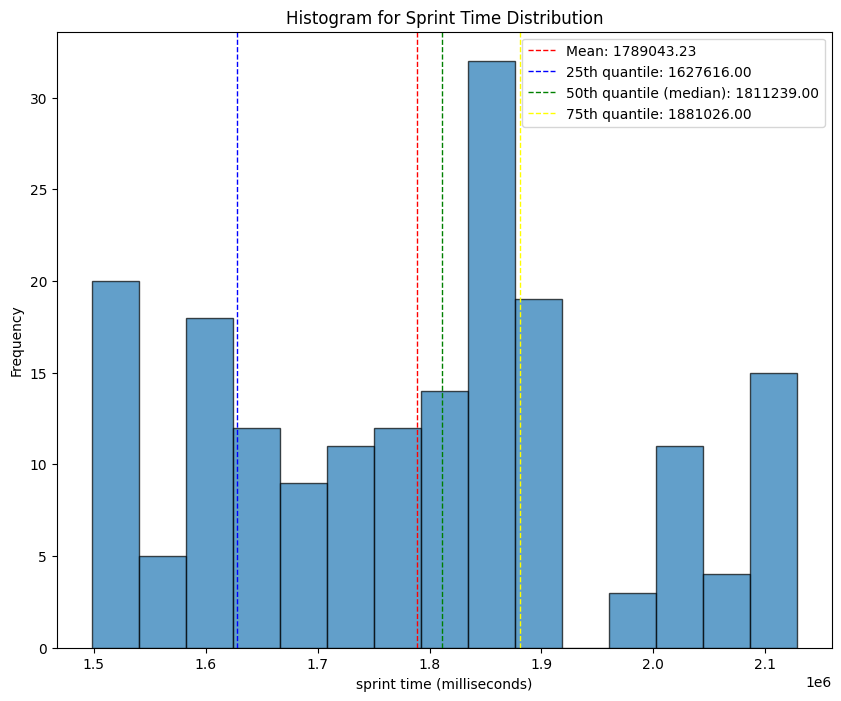

In [10]:
plt.figure(figsize = (10, 8))
plt.hist(sprint['sprint_time'], bins = 15, edgecolor = 'black', alpha = 0.7)

# Adding mean and quantiles
mean_val = sprint['sprint_time'].mean()
quantile_25 = sprint['sprint_time'].quantile(0.25)
quantile_50 = sprint['sprint_time'].quantile(0.50)
quantile_75 = sprint['sprint_time'].quantile(0.75)

plt.axvline(mean_val, color='red', linestyle='dashed', 
linewidth=1, label=f"Mean: {mean_val:.2f}")
plt.axvline(quantile_25, color='blue', linestyle='dashed', 
linewidth=1, label=f"25th quantile: {quantile_25:.2f}")
plt.axvline(quantile_50, color='green', linestyle='dashed', 
linewidth=1, label=f"50th quantile (median): {quantile_50:.2f}")
plt.axvline(quantile_75, color='yellow', linestyle='dashed', 
linewidth=1, label=f"75th quantile: {quantile_75:.2f}")

plt.title(f'Histogram for Sprint Time Distribution')
plt.xlabel('sprint time (milliseconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [11]:
sprint_race = pd.merge(sprint, results, on = ['raceId', 'driverId'], how = 'left')
sprint_race = pd.merge(sprint_race, cons, on = ['constructorId'], how = 'left')
sprint_race = pd.merge(sprint_race, my_races, on = ['raceId'], how = 'left')

# remove missing values
sprint_race.replace('\\N', np.nan, inplace=True)
sprint_race.dropna(inplace=True)

sprint_race.head()

,raceId,driverId,constructorId,sprint_points,sprint_laps,sprint_time,race_points,race_laps,race_time,name,year
1,1061,1,131,2,17,1539856,25.0,52.0,7103284.0,Mercedes,2021
2,1061,822,131,1,17,1545928,15.0,52.0,7114409.0,Mercedes,2021
3,1061,844,6,0,17,1549704,18.0,52.0,7107155.0,Ferrari,2021
4,1061,846,1,0,17,1562537,12.0,52.0,7131857.0,McLaren,2021
5,1061,817,1,0,17,1569385,10.0,52.0,7145908.0,McLaren,2021


In [12]:
sprint_race.describe()

,raceId,driverId,constructorId,sprint_points,sprint_laps,sprint_time,race_points,race_laps,race_time,year
count,113.000000,113.000000,113.000000,113.000000,113.000000,1.130000e+02,113.000000,113.000000,1.130000e+02,113.000000
mean,1090.495575,712.787611,86.584071,1.929204,19.044248,1.790555e+06,8.389381,58.460177,5.531461e+06,2022.176991
std,19.130251,299.017930,83.447987,2.721334,4.283251,1.894851e+05,7.988198,9.936437,6.254821e+05,0.847582
min,1061.000000,1.000000,1.000000,0.000000,11.000000,1.498433e+06,0.000000,44.000000,4.914365e+06,2021.000000
25%,1071.000000,822.000000,6.000000,0.000000,17.000000,1.591993e+06,1.000000,51.000000,5.053521e+06,2021.000000
50%,1095.000000,839.000000,51.000000,0.000000,19.000000,1.821801e+06,8.000000,57.000000,5.341468e+06,2022.000000
75%,1107.000000,846.000000,131.000000,4.000000,24.000000,1.879578e+06,15.000000,71.000000,5.652165e+06,2023.000000
max,1115.000000,858.000000,214.000000,8.000000,24.000000,2.128165e+06,26.000000,71.000000,7.188611e+06,2023.000000


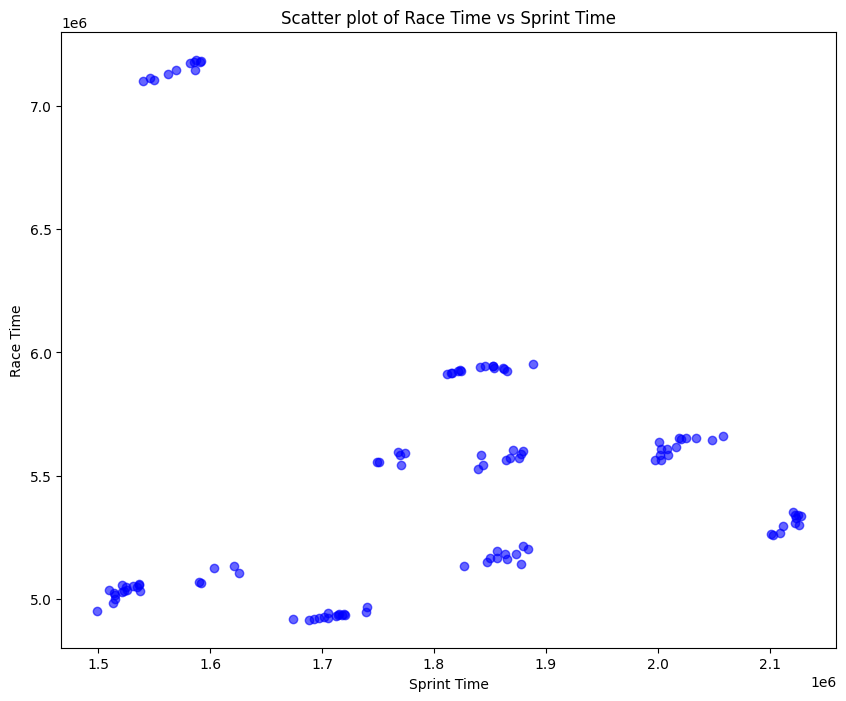

In [21]:
plt.figure(figsize = (10,8))
plt.scatter(sprint_race['sprint_time'], sprint_race['race_time'], color='blue', alpha=0.6)
plt.title('Scatter plot of Race Time vs Sprint Time')
plt.xlabel('Sprint Time')
plt.ylabel('Race Time')
plt.show()

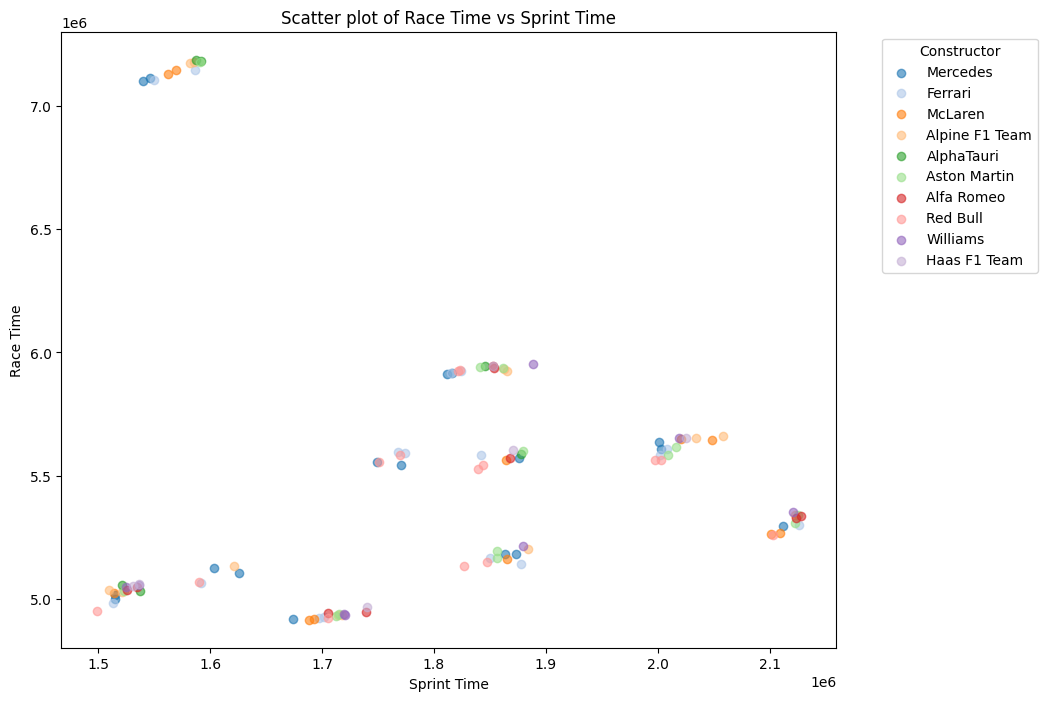

In [17]:
# Create a unique list of constructors and assign colors
unique_constructors = sprint_race['name'].unique()
color_mapping = dict(zip(unique_constructors, plt.cm.tab20.colors[:len(unique_constructors)]))

plt.figure(figsize = (10,8))

# Plotting
for constructor, color in color_mapping.items():
    subset = sprint_race[sprint_race['name'] == constructor]
    plt.scatter(subset['sprint_time'], subset['race_time'], color=color, alpha=0.6, label=constructor)


#plt.scatter(sprint_race['sprint_time'], sprint_race['race_time'], alpha = 0.6)
plt.title('Scatter plot of Race Time vs Sprint Time')
plt.xlabel('Sprint Time')
plt.ylabel('Race Time')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside plot
plt.show()


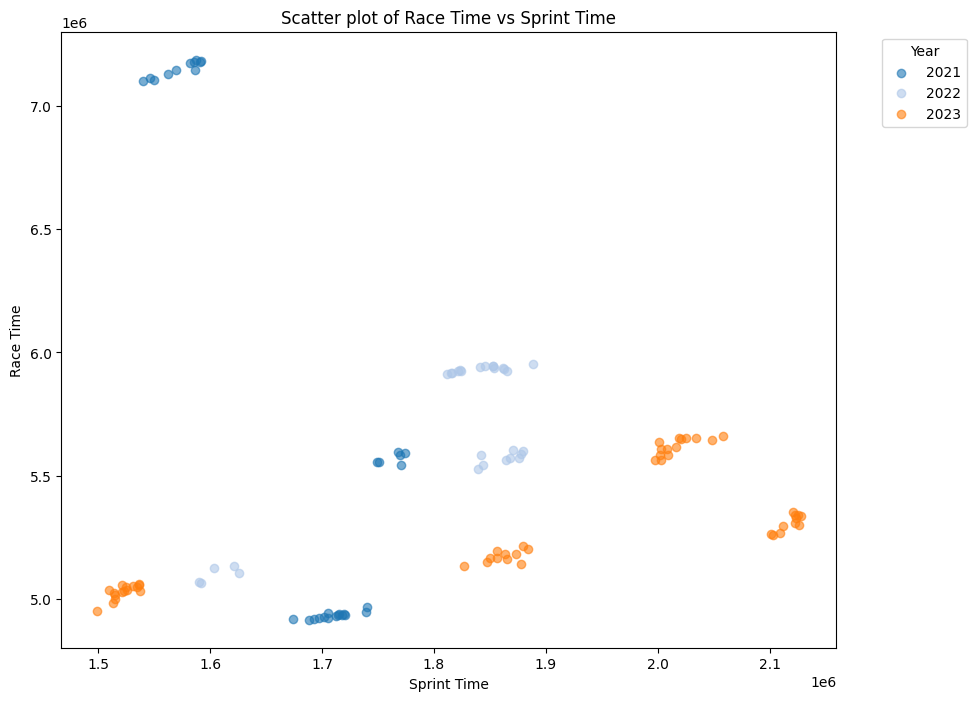

In [18]:
# Create a unique list of constructors and assign colors
unique_constructors = sprint_race['year'].unique()
color_mapping = dict(zip(unique_constructors, plt.cm.tab20.colors[:len(unique_constructors)]))

plt.figure(figsize = (10,8))

# Plotting
for constructor, color in color_mapping.items():
    subset = sprint_race[sprint_race['year'] == constructor]
    plt.scatter(subset['sprint_time'], subset['race_time'], color=color, alpha=0.6, label=constructor)


#plt.scatter(sprint_race['sprint_time'], sprint_race['race_time'], alpha = 0.6)
plt.title('Scatter plot of Race Time vs Sprint Time')
plt.xlabel('Sprint Time')
plt.ylabel('Race Time')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside plot
plt.show()


## Bayesian Analysis

In [22]:
import pymc as pm
import arviz as az
import scipy.stats as sts
import pytensor.tensor as pt

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [26]:
# Linear Model with Student T likelihood
with pm.Model() as linear_model:
    # Priors
    a = pm.Uniform('a', lower = 0, upper = 100)
    b = pm.Uniform('b', lower = 0, upper = 100)
    nu = pm.HalfNormal('nu', sigma = 30)  # degrees of freedom for Student's T
    sigma = pm.Uniform('sigma', 0, 30)
    
    # Data
    x = pm.MutableData('x', sprint_race['sprint_time'])
    y = pm.MutableData('y', sprint_race['race_time'])

    # Regression Mean (Linear Function)
    mu = pm.Deterministic('mu', a + b * x)
    
    # Likelihood using Student's T
    pm.StudentT('likelihood', nu = nu, mu = mu, sigma = sigma, observed = y)
    
    # Sampling
    linear_trace = pm.sample(tune = 1000, draws = 1000, chains = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, nu, sigma]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 367 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,49.506,27.719,3.748,95.130,0.777,0.552,1236.0,1294.0,1.00
b,2.942,0.316,2.506,3.302,0.158,0.121,5.0,31.0,2.89
nu,0.094,0.009,0.077,0.113,0.001,0.001,51.0,1297.0,1.06
sigma,27.556,2.277,23.301,30.000,0.059,0.043,1037.0,868.0,1.00


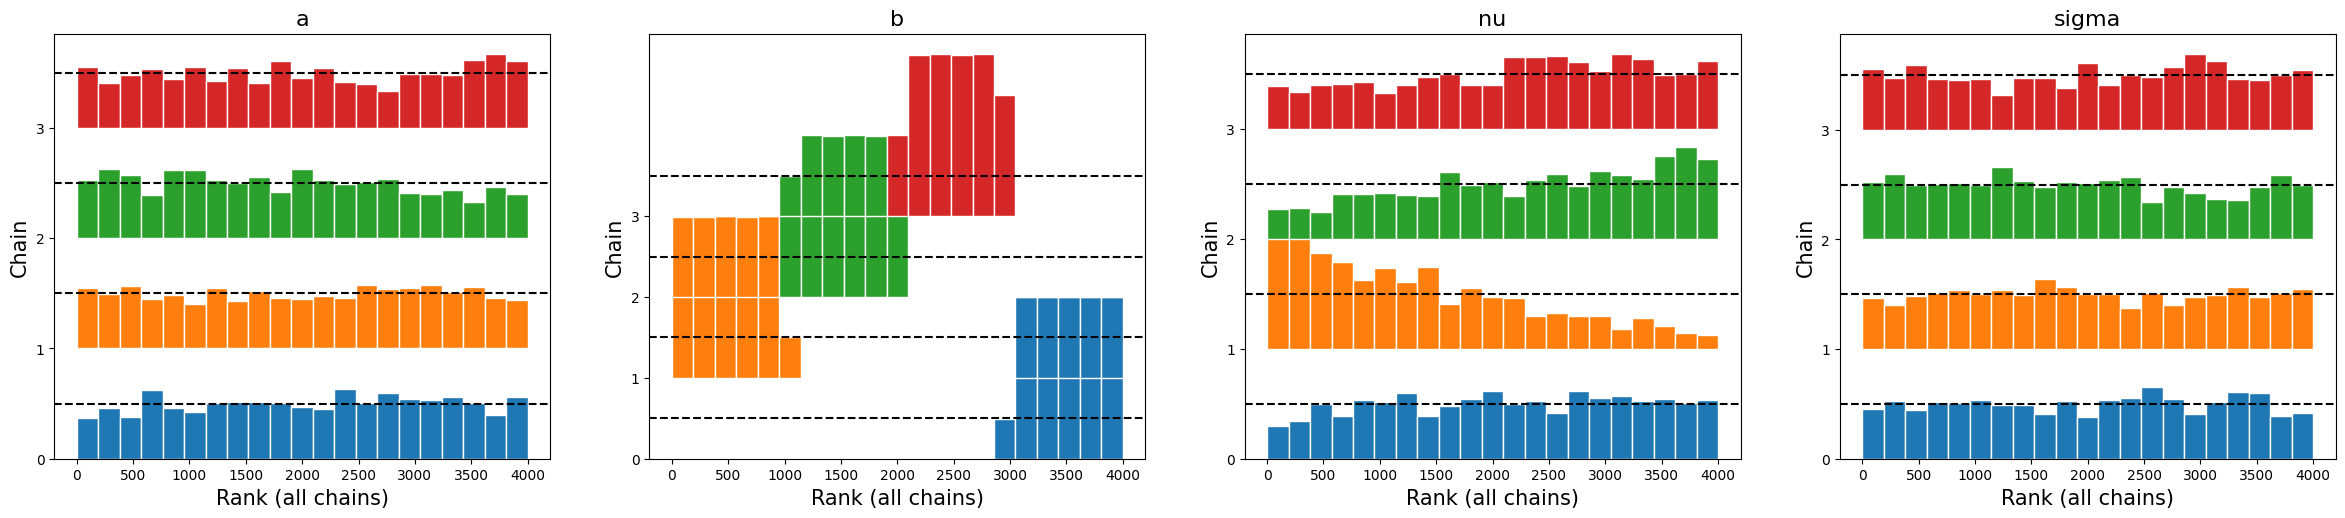

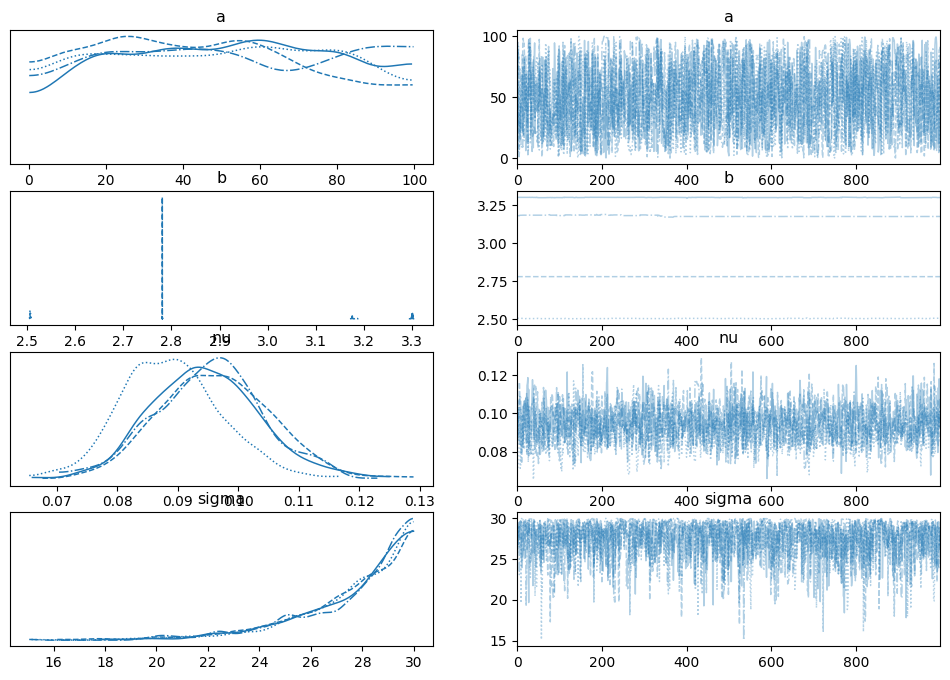

In [27]:
az.plot_rank(linear_trace, var_names=['a', 'b', 'nu', 'sigma'])
az.plot_trace(linear_trace, var_names=['a', 'b', 'nu', 'sigma'])
az.summary(linear_trace, var_names=['a', 'b', 'nu', 'sigma'])

/Users/macbethmatibe/opt/anaconda3/lib/python3.8/site-packages/arviz/plots/hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


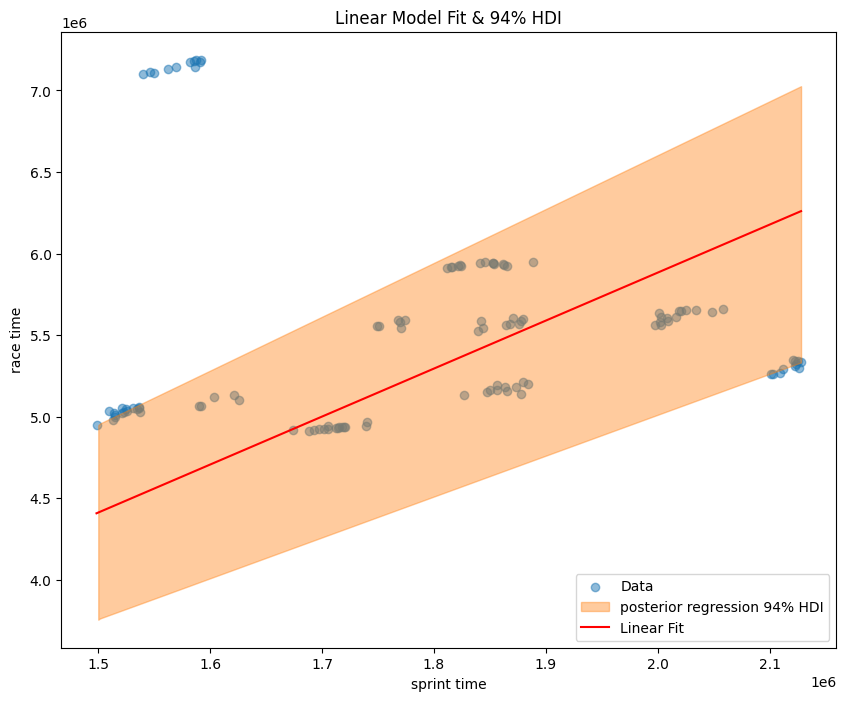

In [29]:
# Compute mean values for a and b
a_samples = linear_trace.posterior['a'].values.flatten()
b_samples = linear_trace.posterior['b'].values.flatten()

a_mean = a_samples.mean()
b_mean = b_samples.mean()

# Predicted values using the mean parameter estimates
x_vals = np.linspace(min(sprint_race['sprint_time']), 
                     max(sprint_race['sprint_time']), 1000)
y_vals = a_mean + b_mean * x_vals

# Compute posterior distributions of the predictions
posterior_mu = (a_samples[:, None] + b_samples[:, None] * x_vals)

# Plot the data with the line of best fit & HDI
plt.figure(figsize = (10, 8))
plt.scatter(sprint_race['sprint_time'], 
            sprint_race['race_time'], label = 'Data', alpha = 0.5)
az.plot_hdi(x_vals, posterior_mu, hdi_prob = 0.94, color = 'C1', 
            fill_kwargs = {'alpha': 0.4, 'label': 'posterior regression 94% HDI'})
plt.plot(x_vals, y_vals, c = 'red', label = 'Linear Fit') # the line
plt.title('Linear Model Fit & 94% HDI')
plt.xlabel('sprint time')
plt.ylabel('race time')
plt.legend()
plt.show()

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Mixed-effects model
model = smf.mixedlm('race_time ~ sprint_time', sprint_race, groups = sprint_race['year'])
result = model.fit()

# Print summary
print(result.summary())

                  Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    race_time        
No. Observations:      113        Method:                REML             
No. Groups:            3          Scale:                 340168701178.6348
Min. group size:       29         Log-Likelihood:        -1650.2207       
Max. group size:       52         Converged:             Yes              
Mean group size:       37.7                                               
--------------------------------------------------------------------------
                 Coef.       Std.Err.    z   P>|z|    [0.025      0.975]  
--------------------------------------------------------------------------
Intercept       5269029.113 593696.086 8.875 0.000 4105406.166 6432652.060
sprint_time           0.177      0.320 0.554 0.580      -0.450       0.804
Group Var   80382118599.011 155451.707                                    

